<div style="border: 2px solid #FFA500; padding: 10px; border-radius: 5px; background-color: #FFFACD; color: black; text-align: center;">
  <h1 style="margin: 0;">PULPO 🐙 Exercise</h1>
</div>

This exercise is crafted to test your understanding of PULPO syntax.

You’ll be working with a custom-built, generic LCI database designed specifically for this task. Here’s how the elements are represented:
- **Products**: Numbered simply as 1, 2, etc.
- **Processes**: Denoted by Latin letters (A, B, etc.).
- **Regions**: Identified by Greek letters ($\alpha$, $\beta$, etc.).
- **Environmental Flows**: Labeled as e1, e2, etc.
- **Methods**: Named m1, m2, etc., all categorized under "generated_system_example".

### Your Challenge:
1.  Introduce a new process in a specific region to produce a chosen product.
2.  Measure the environmental impact of this process using a specified impact assessment method.
3.  Identify the best existing process alternative in the region for producing the same product.
4.  Investigate whether a better process alternative exists when considering other regions.
5.  Explore if the optimal solution changes when adjusting the objective.
6.  Find a trade-off solution that minimizes one impact category while keeping another in check.

____
Import the necessary libraries

In [1]:
import os
import sys
sys.path.append(r'C:\Users\Usuario\Documents\PhD Documents\Python\advanced_lca\pulpo') # Not needed anymore when the package is installed via pip
from pulpo import pulpo

import numpy as np
np.NaN = np.nan
import pandas as pd
import copy
import matplotlib.pyplot as plt

If you want to perform the visualization of the graph, install:

In [2]:
#!pip install python-louvain
#!pip install networkx

In [3]:
import networkx as nx
import community as community_louvain  # For Louvain clustering

_____
Install the generic LCI database via the `install_generic_db` function of pulpo. This database can be tailored with various parameters:

In [4]:
project = "generic_example"
database = "generic_db"
n_prod = 50      # Number of products to generate
n_proc = 8      # Maximum number of processes per product
n_reg = 4       # Number of regions where processes can be active
n_inputs = 6    # Maximum number of inputs per process
n_flows = 8     # Number of environmental flows to generate
n_methods = 3   # Number of impact assessment methods to create
seed = 100      # Seed for reproducibility (optional)
return_data = True  # If True, returns the generated matrices

# Install the generic database with specified parameters (Can take a while!)
if True:
    technosphere_matrix, biosphere_matrix, characterization_matrices = pulpo.install_generic_db(
        project=project, 
        database=database, 
        n_prod=n_prod, 
        n_proc=n_proc, 
        n_reg=n_reg, 
        n_inputs=n_inputs, 
        n_flows=n_flows, 
        n_methods=n_methods, 
        seed=seed, 
        return_data=return_data
    )

Writing activities to SQLite3 database:


Project 'generic_example' already exists. Deleting existing databases.
Vacuuming database 
Proceeding with creating both technosphere and biosphere databases.


0% [########] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 09/04/2024 15:29:40
  Finished: 09/04/2024 15:29:40
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 0.67
Biosphere database created
Technosphere database created
Exchanges added to the technosphere and market activities in the database
LCIA methods and CFs defined


#### Visualize the Technosphere

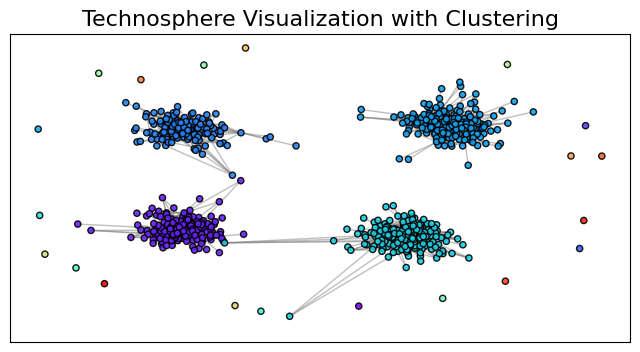

In [5]:
# Create a graph from the adjacency matrix
# Set all elements that are exactly 1 to 0
technosphere_matrix[technosphere_matrix == 1] = 0

G = nx.from_numpy_array(np.abs(technosphere_matrix))

# Perform community detection (clustering) using the Louvain method
partition = community_louvain.best_partition(G)

# Generate a color palette for the clusters
unique_clusters = set(partition.values())
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_clusters)))

# Assign colors to nodes based on their cluster
node_colors = [colors[partition[node]] for node in G.nodes()]

# Draw the graph
plt.figure(figsize=(8, 4))
pos = nx.spring_layout(G, seed=100)  # Position nodes using the spring layout algorithm

nx.draw_networkx_nodes(G, pos, node_size=20, node_color=node_colors, edgecolors='black', alpha=0.9)
nx.draw_networkx_edges(G, pos, edge_color="gray", alpha=0.5)
plt.title("Technosphere Visualization with Clustering", fontsize=16)
plt.show()

When visualizing the network using the Louvain clustering algorithm, the four distinct regions are effectively identified. This clustering occurs because the generic database is structured so that no transportation between regions takes place, naturally leading to these well-defined clusters. Additionally, 20 processes are isolated, meaning they neither contribute to any market nor receive inputs from the technosphere.

Here are the regions, for copy and paste purpose:

1. **Alpha**: $\alpha$
2. **Beta**: $\beta$
3. **Gamma**: $\gamma$
4. **Delta**: $\delta$
______

### Task 1: Introduce a New Process

**Objective**: Introduce a new process in a specific region to produce a chosen product.

First, use PULPO to identify how many activities currently produce **"Product 22"**.

In [6]:
notebook_dir = os.path.dirname(os.getcwd())
directory = os.path.join(notebook_dir, 'data')
method = ""
pulpo_worker = pulpo.PulpoOptimizer(project, database, method, directory)
pulpo_worker.get_lci_data()

In [7]:
#### Fill the gap!

In [8]:
product_22 = pulpo_worker.retrieve_activities(reference_products=['Product 22'])
pd.DataFrame(product_22)

,code,database,location,name,reference product,unit
0,22_α,generic_db,α,Market 22_α,Product 22,unit
1,22_D_γ,generic_db,γ,Process 22_D_γ,Product 22,unit
2,22_A_α,generic_db,α,Process 22_A_α,Product 22,unit
3,22_G_β,generic_db,β,Process 22_G_β,Product 22,unit
4,22_B_γ,generic_db,γ,Process 22_B_γ,Product 22,unit
5,22_A_δ,generic_db,δ,Process 22_A_δ,Product 22,unit
6,22_δ,generic_db,δ,Market 22_δ,Product 22,unit
7,22_E_δ,generic_db,δ,Process 22_E_δ,Product 22,unit
8,22_β,generic_db,β,Market 22_β,Product 22,unit
9,22_E_β,generic_db,β,Process 22_E_β,Product 22,unit


If executed correctly, you should discover that there are **8 processes** (_6 types: A, B, D, E, G, and H_) producing **product 22** across **4 regions** (markets).

Your company, located in region **β**, has developed an innovative process called **"X"** to produce **product 22**. This new technology boasts very low emissions, making it a promising option for the industry’s goal of reducing impacts in the **"m1"** impact category, particularly by minimizing **"e2"** (environmental flow) emissions.

- **Technosphere**:
  - 0.1 units of **product 20** from the market in region **β**

- **Biosphere**:
  - 0.01 units of **e2** emissions
  - 0.10 units of **e3** emissions
  - 1.00 units of **e4** emissions

Using Brightway syntax, implement this new process "X" in the database.


In [9]:
import brightway2 as bw

# Set the current project
bw.projects.set_current("generic_example")

# Define the database and process name
db = bw.Database("generic_db")
process_name = "Process 22_X_β"

# Check if the activity already exists
if process_name not in [act['name'] for act in db]:
    # Create the new process "X"
    new_process = db.new_activity(process_name)
    new_process.update({
        'name': process_name,
        'location': "β",  # Greek letter for the region
        'reference product': "Product 22",
        'unit': "unit"  # Define the unit
    })

    # Add technosphere exchange
    product_20_market = next(act for act in db if act['reference product'] == "Product 20" and act['location'] == "β" and "Market" in act['name'])
    new_process.new_exchange(input=product_20_market.key, amount=0.1, type='technosphere').save()

    # Add biosphere exchanges
    biosphere = bw.Database("biosphere3")
    emissions = {
        "Environmental flow e2": 0.05,
        "Environmental flow e3": 0.10,
        "Environmental flow e8": 5.00
    }
    for flow_name, amount in emissions.items():
        flow = next(flow for flow in biosphere if flow['name'] == flow_name)
        new_process.new_exchange(input=flow.key, amount=amount, type='biosphere').save()

    new_process.save()
    print(f"Process '{process_name}' implemented successfully in the database.")
else:
    print(f"Process '{process_name}' already exists in the database.")

Process 'Process 22_X_β' implemented successfully in the database.


____________
### Task 2: Evaluate the New Process

**Objective**: Assess the environmental impact of the newly introduced process using a given impact assessment method.

After implementing the new process **"Process 22_X_β"** in Task 1, your next step is to evaluate its environmental performance. Use PULPO to calculate the impacts of this process (producing 1 unit as FU) using the **"m1"** impact assessment method.

<div style="border: 2px solid #FF4500; padding: 10px; border-radius: 5px; background-color: #FFEFD5; color: black;"> 
  ⚠️ <strong>Warning!</strong> The standard open-source LP solver specified in <strong>PULPO</strong> 
  (<a href="https://pypi.org/project/highspy/">HiGHs</a>) performs poorly on this database. Consider installing 
  "[ipopt](https://anaconda.org/conda-forge/ipopt)" from the conda package index. Use version <strong>3.11.1</strong>, as there are unknown issues / incompatibilities in later versions.
</div>

In [10]:
#!conda install conda-forge::ipopt=3.11.1 -y

In [11]:
#### Fill the gap!

In [12]:
pulpo_worker.method = {"('generated_system_example', 'm1')": 1}
pulpo_worker.get_lci_data()

In [13]:
process_X = pulpo_worker.retrieve_activities(activities=process_name)

In [14]:
demand = {process_X[0]: 1}

In [15]:
pulpo_worker.instantiate(demand=demand)

Creating Instance
Instance created


In [16]:
results = pulpo_worker.solve(solver_name='ipopt')

In [17]:
pulpo_worker.summarize_results(demand=demand, zeroes=True)

The following demand / functional unit has been specified: 


,Demand
Process 22_X_β | Product 22 | β,1



These are the impacts contained in the objective:


,Key,Value
0,"('generated_system_example', 'm1')",0.01009



The following choices were made: 
No additional constraints have been passed.


<div style="padding: 15px; border-left: 5px solid #2196F3; background-color: #f9f9f9; color: #000;">
    <strong>Result:</strong> If executed properly, the <strong>"m1"</strong> impact is determined to be <strong>0.010090 units</strong>.
</div>

___________
### Task 3: Identify the Best Process Alternative

**Objective**: Determine the best existing process alternative in the region to produce **Product 22**.

With the environmental impacts of **"Process 22_X_β"** evaluated in Task 2, the next step is to compare it against other existing processes in region **β**. Your goal is to identify which process is the most environmentally efficient option (targeting "**m1**") for producing **Product 22**.

In [18]:
#### Fill the gap!

In [19]:
candidates = pulpo_worker.retrieve_activities(reference_products=["Product 22"], locations=["β"])
market = [x for x in candidates if "Market" in x["name"]]
alternatives = [x for x in candidates if "Process" in x["name"]]

In [20]:
demand = {market[0]: 1}

In [21]:
choices = {"P22β": {choice: 10 for choice in alternatives}}

In [22]:
pulpo_worker.instantiate(demand=demand, choices=choices)

Creating Instance
Instance created


In [23]:
pulpo_worker.solve(solver_name='ipopt')

{'Problem': [{'Lower bound': -inf, 'Upper bound': inf, 'Number of objectives': 1, 'Number of constraints': 2600, 'Number of variables': 1300, 'Sense': 'unknown'}], 'Solver': [{'Status': 'ok', 'Message': 'Ipopt 3.11.1\\x3a Optimal Solution Found', 'Termination condition': 'optimal', 'Id': 0, 'Error rc': 0, 'Time': 0.16944670677185059}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

In [24]:
pulpo_worker.summarize_results(choices=choices, demand=demand, zeroes=True)

The following demand / functional unit has been specified: 


,Demand
Market 22_β | Product 22 | β,1



These are the impacts contained in the objective:


,Key,Value
0,"('generated_system_example', 'm1')",0.010089



The following choices were made: 
P22β


P22β                       
                                   Activity Capacity         Value
Activity 0  Process 22_X_β | Product 22 | β       10  1.000085e+00
Activity 1  Process 22_E_β | Product 22 | β       10  1.983511e-07
Activity 2  Process 22_H_β | Product 22 | β       10  2.854574e-07
Activity 3  Process 22_G_β | Product 22 | β       10  1.436290e-08

No additional constraints have been passed.


<div style="padding: 15px; border-left: 5px solid #4CAF50; background-color: #f9f9f9; color: #000;">
    <strong>Outcome:</strong> The analysis reveals that the new process <strong>Process 22_X_β</strong> is the most environmentally efficient (targeting "m1"!) alternative in the region for producing <strong>Product 22</strong>
</div>

<div style="padding: 15px; border-left: 5px solid #FF9800; background-color: #f9f9f9; color: #000;">
    <strong>Important Note:</strong> When determining the best alternative based on the optimal market choice, the impact of <strong>Process X</strong> slightly decreases compared to the isolated assessment (0.010089 < 0.01009). This minor difference is due to the broader adoption of <strong>Process X</strong> in the background system, effectively lowering the upstream impacts, which include a very small amount of <strong>Product 22</strong> (0.000085 units).
</div>

__________________
### Task 4: Expand the Analysis

**Objective**: Investigate whether a better process alternative exists when considering other regions.

In [25]:
#### Fill the gap!

In [26]:
candidates = pulpo_worker.retrieve_activities(reference_products=["Product 22"])
alternatives = [x for x in candidates if "Process" in x["name"]]

In [27]:
choices = {"P22β": {choice: 10 for choice in alternatives}}

In [28]:
choices

{'P22β': {'Process 22_E_β' (unit, β, None): 10,
  'Process 22_G_β' (unit, β, None): 10,
  'Process 22_B_γ' (unit, γ, None): 10,
  'Process 22_H_β' (unit, β, None): 10,
  'Process 22_E_δ' (unit, δ, None): 10,
  'Process 22_A_α' (unit, α, None): 10,
  'Process 22_A_δ' (unit, δ, None): 10,
  'Process 22_X_β' (unit, β, None): 10,
  'Process 22_D_γ' (unit, γ, None): 10}}

In [29]:
pulpo_worker.instantiate(demand=demand, choices=choices)

Creating Instance
Instance created


In [30]:
pulpo_worker.solve(solver_name='ipopt')

{'Problem': [{'Lower bound': -inf, 'Upper bound': inf, 'Number of objectives': 1, 'Number of constraints': 2590, 'Number of variables': 1295, 'Sense': 'unknown'}], 'Solver': [{'Status': 'ok', 'Message': 'Ipopt 3.11.1\\x3a Optimal Solution Found', 'Termination condition': 'optimal', 'Id': 0, 'Error rc': 0, 'Time': 0.18684029579162598}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

In [31]:
pulpo_worker.summarize_results(choices=choices, demand=demand, zeroes=True)

The following demand / functional unit has been specified: 


,Demand
Market 22_β | Product 22 | β,1



These are the impacts contained in the objective:


,Key,Value
0,"('generated_system_example', 'm1')",0.010089



The following choices were made: 
P22β


P22β                       
                                   Activity Capacity         Value
Activity 0  Process 22_E_β | Product 22 | β       10  1.983548e-07
Activity 1  Process 22_G_β | Product 22 | β       10  1.436289e-08
Activity 2  Process 22_B_γ | Product 22 | γ       10  2.500517e-08
Activity 3  Process 22_H_β | Product 22 | β       10  2.854571e-07
Activity 4  Process 22_E_δ | Product 22 | δ       10  9.775972e-08
Activity 5  Process 22_A_α | Product 22 | α       10  1.594191e-08
Activity 6  Process 22_A_δ | Product 22 | δ       10  5.273957e-08
Activity 7  Process 22_X_β | Product 22 | β       10  1.000085e+00
Activity 8  Process 22_D_γ | Product 22 | γ       10  1.791214e-08

No additional constraints have been passed.


<div style="padding: 15px; border-left: 5px solid #4CAF50; background-color: #f9f9f9; color: #000;">
    <strong>Outcome:</strong> The analysis reveals that the new process <strong>Process 22_X_β</strong> is the most environmentally efficient alternative (targeting "m1"!) among all regions and processes for producing <strong>Product 22</strong>
</div>

_______
### Task 5: Reframe the Objective

**Objective**: Explore if the optimal solution changes when adjusting the objective.

In this task, you will reassess the previously identified optimal process by changing the objective function. By adjusting the objective to prioritize a different impact category or a combination of categories, you will determine if the optimal process choice remains the same or shifts under the new criterion. Use "**m2**" as objective, but evaluate also **m1**.


In [32]:
#### Fill the gap!

In [33]:
pulpo_worker.method = {"('generated_system_example', 'm1')": 0,
                       "('generated_system_example', 'm2')": 1}
pulpo_worker.get_lci_data()

In [34]:
pulpo_worker.instantiate(demand=demand, choices=choices)

Creating Instance
Instance created


In [35]:
pulpo_worker.solve(solver_name='ipopt')

{'Problem': [{'Lower bound': -inf, 'Upper bound': inf, 'Number of objectives': 1, 'Number of constraints': 2590, 'Number of variables': 1295, 'Sense': 'unknown'}], 'Solver': [{'Status': 'ok', 'Message': 'Ipopt 3.11.1\\x3a Optimal Solution Found', 'Termination condition': 'optimal', 'Id': 0, 'Error rc': 0, 'Time': 0.16982316970825195}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

In [36]:
pulpo_worker.summarize_results(choices=choices, demand=demand, zeroes=True)

The following demand / functional unit has been specified: 


,Demand
Market 22_β | Product 22 | β,1



These are the impacts contained in the objective:


,Key,Value
0,"('generated_system_example', 'm2')",0.114117



The following impacts were calculated: 


,Key,Value
1,"('generated_system_example', 'm2')",0.114117
0,"('generated_system_example', 'm1')",0.050346



The following choices were made: 
P22β


P22β                       
                                   Activity Capacity         Value
Activity 0  Process 22_E_β | Product 22 | β       10  8.143762e-08
Activity 1  Process 22_G_β | Product 22 | β       10  4.530763e-09
Activity 2  Process 22_B_γ | Product 22 | γ       10 -3.054073e-09
Activity 3  Process 22_H_β | Product 22 | β       10  1.084861e-08
Activity 4  Process 22_E_δ | Product 22 | δ       10  1.176843e-08
Activity 5  Process 22_A_α | Product 22 | α       10  5.073199e-08
Activity 6  Process 22_A_δ | Product 22 | δ       10  1.007902e+00
Activity 7  Process 22_X_β | Product 22 | β       10 -7.351682e-09
Activity 8  Process 22_D_γ | Product 22 | γ       10  6.593671e-08

No additional constraints have been passed.


<div style="padding: 15px; border-left: 5px solid #4CAF50; background-color: #f9f9f9; color: #000;">
    <strong>Outcome:</strong> Changing the objective reveals that <strong>Technology A</strong> from region <strong>δ</strong> is the best option for minimizing the <strong>m2</strong> impact. However, this comes with a trade-off: the corresponding <strong>m1</strong> impact is significantly higher (0.050346 points) compared to the <strong>m1</strong> optimal solution (0.010089 points).
</div>

_________
### Task 6: Balance the Trade-offs

**Objective**: Find a trade-off solution that minimizes one impact category while keeping another in some limits.

In this task, you will try to achieve a balance between the two identified competing impact categories **m2** and **m1**. Particularily, limit the **m1** impact to 0.025 points and find the optimum technology mix.


In [37]:
epsilon_constraint = {"('generated_system_example', 'm1')": 0.025}

In [38]:
pulpo_worker.instantiate(choices=choices, demand=demand, upper_imp_limit=epsilon_constraint)

Creating Instance
Instance created


In [39]:
pulpo_worker.solve(solver_name='ipopt')

{'Problem': [{'Lower bound': -inf, 'Upper bound': inf, 'Number of objectives': 1, 'Number of constraints': 2592, 'Number of variables': 1296, 'Sense': 'unknown'}], 'Solver': [{'Status': 'ok', 'Message': 'Ipopt 3.11.1\\x3a Optimal Solution Found', 'Termination condition': 'optimal', 'Id': 0, 'Error rc': 0, 'Time': 0.21182632446289062}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

In [40]:
pulpo_worker.summarize_results(choices=choices, demand=demand, zeroes=True)

The following demand / functional unit has been specified: 


,Demand
Market 22_β | Product 22 | β,1



These are the impacts contained in the objective:


,Key,Value
1,"('generated_system_example', 'm2')",0.138893
0,"('generated_system_example', 'm1')",0.025000



The following impacts were calculated: 


,Key,Value
1,"('generated_system_example', 'm2')",0.138893
0,"('generated_system_example', 'm1')",0.025000



The following choices were made: 
P22β


P22β                       
                                   Activity Capacity         Value
Activity 0  Process 22_E_β | Product 22 | β       10  9.040458e-01
Activity 1  Process 22_G_β | Product 22 | β       10  7.034459e-10
Activity 2  Process 22_B_γ | Product 22 | γ       10 -3.727221e-09
Activity 3  Process 22_H_β | Product 22 | β       10  1.809254e-08
Activity 4  Process 22_E_δ | Product 22 | δ       10  1.541325e-08
Activity 5  Process 22_A_α | Product 22 | α       10  1.601073e-08
Activity 6  Process 22_A_δ | Product 22 | δ       10  1.011045e-01
Activity 7  Process 22_X_β | Product 22 | β       10 -7.236773e-09
Activity 8  Process 22_D_γ | Product 22 | γ       10  2.077108e-08

No additional constraints have been passed.


<div style="padding: 15px; border-left: 5px solid #4CAF50; background-color: #f9f9f9; color: #000;">
    <strong>Outcome:</strong> When executed correctly, the optimal technology mix consists of 90% <strong>Technology E</strong> in region <strong>β</strong> and 10% <strong>Technology A</strong> in region <strong>δ</strong>. Interestingly, this result is not simply a linear combination of the solutions that minimize each individual objective (X in β and A in δ) but rather a unique mix that offers a balanced approach, achieving more moderate emissions across both impact categories.
</div>
<div style="padding: 15px; border-left: 5px solid #FF9800; background-color: #f9f9f9; color: #000;">
    This demonstration / exercise highlights the importance of evaluating all technological and regional options when searching for balanced solutions. Additionally, as shown in the 02_rice_example_resolution.ipynb notebook, considering capacity constraints is essential for identifying feasible solutions when scaling systems.
</div>